**CAR PRICE PREDICTION USING LINEAR REGRESSION**

.

**INTRODUCTION**:
Car price prediction is a process that uses advanced technology to estimate the value of a vehicle based on various factors like its make, model, and specifications.it is a fascinating area of machine learning research, and this project serves as an ideal starting point for those interested in exploring this field. In this project, we will guide you through the process of building a car price prediction model using machine learning techniques.

**OBJECTIVE**:
The objective is to develop a machine learning model for car price prediction, leveraging historical data and advanced algorithms to provide accurate estimates for vehicle values, benefiting manufacturers, dealerships, and consumers in the automotive industry.

IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing data set, data is taken from kaggle

df=pd.read_csv("/content/car-price-data.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


EXPLORE THE DATASET

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# Display dataset shape
df.shape

(205, 26)

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#checking for null values

df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
#In the CarName feature we can observe that the values are storing both the car's company name and the car name.
#so We can separate the car company names from CarName feature.

In [ ]:
df['CarName'] = df['CarName'].apply(lambda x: x.split(' ', 1)[0])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['CarName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [ ]:
# Display dataset shape
df.shape

(205, 26)

In [ ]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
df['CarName'] = df['CarName'].str.replace('maxda', 'mazda') \
    .str.replace('Nissan', 'nissan') \
    .str.replace('porcshce', 'porsche') \
    .str.replace('toyouta', 'toyota') \
    .str.replace('vokswagen', 'volkswagen') \
    .str.replace('vw', 'volkswagen')
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

DATA VISUALIZATION



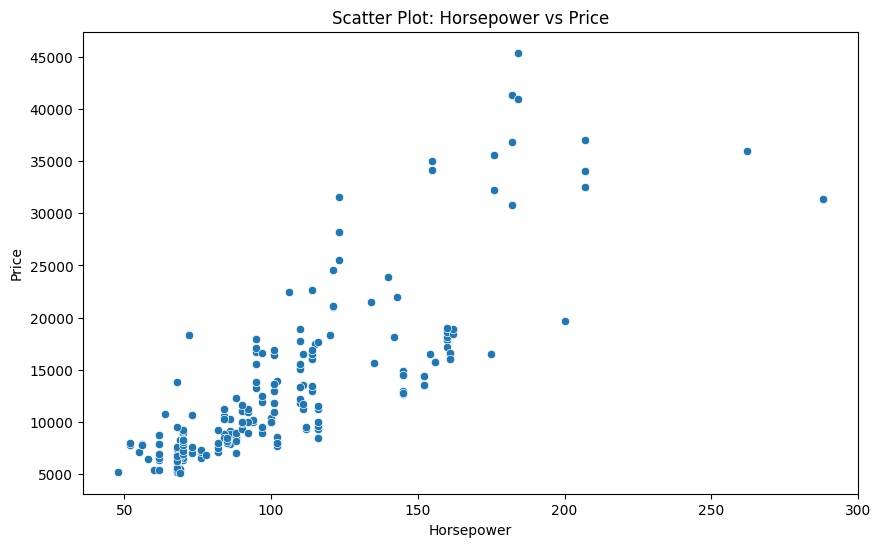

In [ ]:
# Scatter Plot: Relationship between 'horsepower' and 'price'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='horsepower', y='price')
plt.title('Scatter Plot: Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()


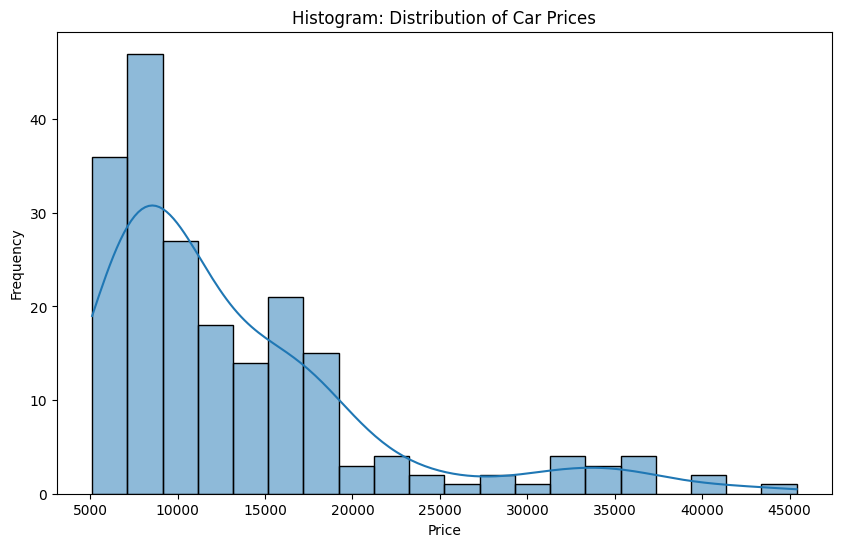

In [ ]:
# Histogram: Distribution of car prices

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=20, kde=True)
plt.title('Histogram: Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

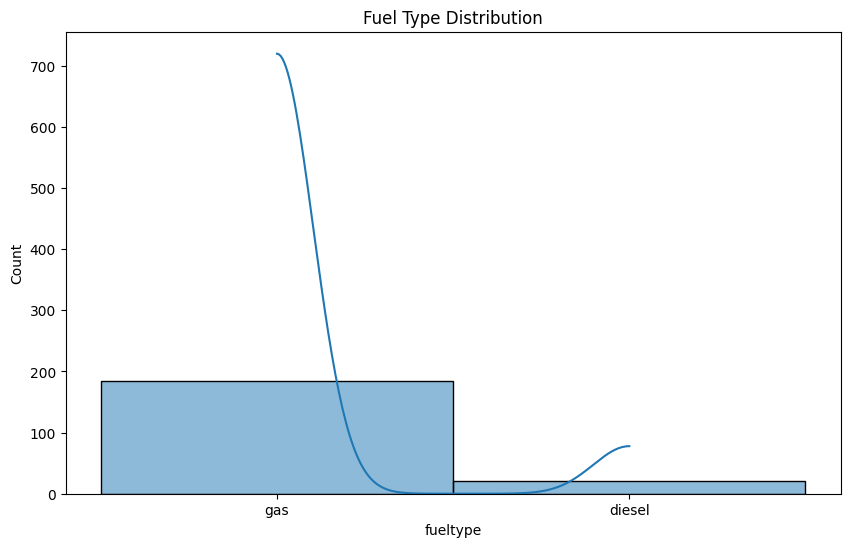

In [ ]:
#Histogram : Fuel Type Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="fueltype", bins=20, kde=True)
plt.title("Fuel Type Distribution")
plt.show()

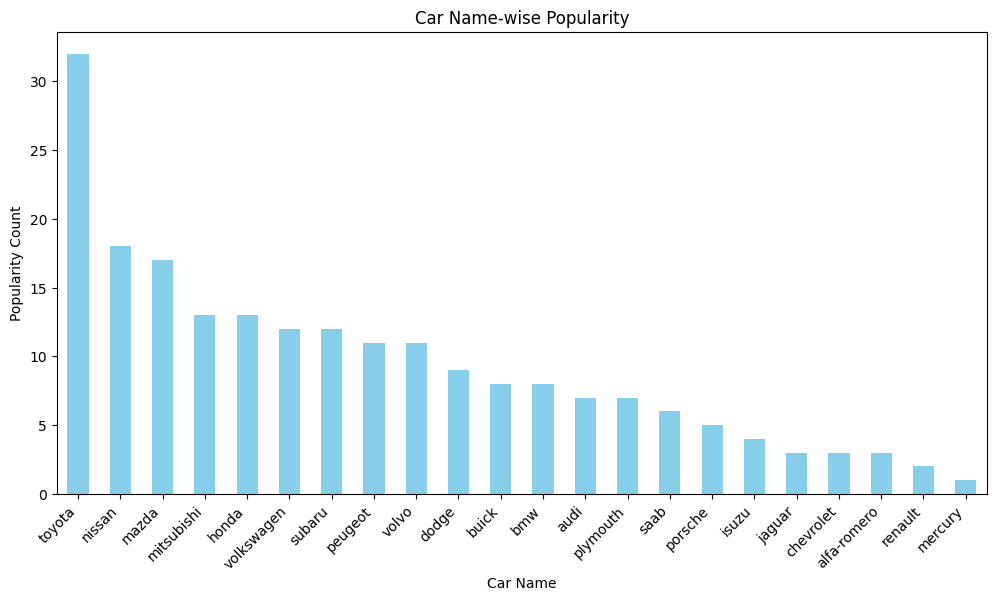

In [ ]:
#histogram: car name-wise popularity

car_name_counts = df['CarName'].value_counts()
plt.figure(figsize=(12, 6))
car_name_counts.plot(kind='bar', color='skyblue')
plt.title('Car Name-wise Popularity')
plt.xlabel('Car Name')
plt.ylabel('Popularity Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


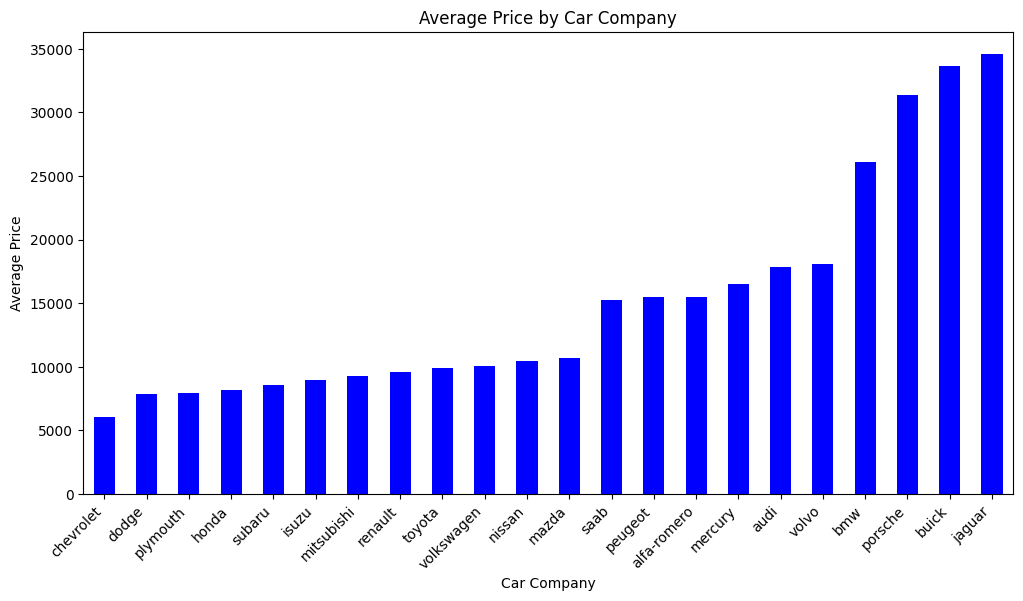

In [ ]:
#histogram : average price by car company

average_prices = df.groupby('CarName')['price'].mean().sort_values()
plt.figure(figsize=(12, 6))
average_prices.plot(kind='bar', color='blue')
plt.title('Average Price by Car Company')
plt.xlabel('Car Company')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-33-262cb2fd501a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['wheelbase'])


<Axes: ylabel='Density'>

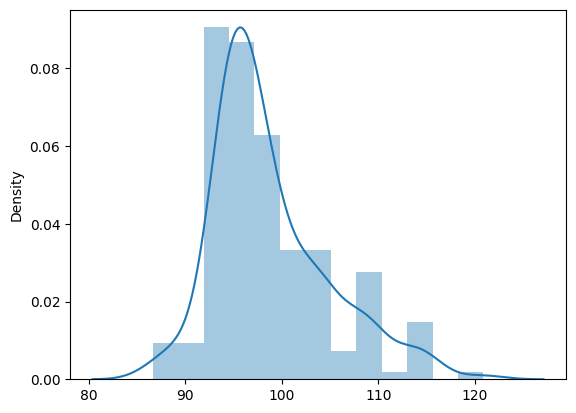

In [ ]:
# visualize the wheelbase column using histogram function

sns.distplot(x=df['wheelbase'])

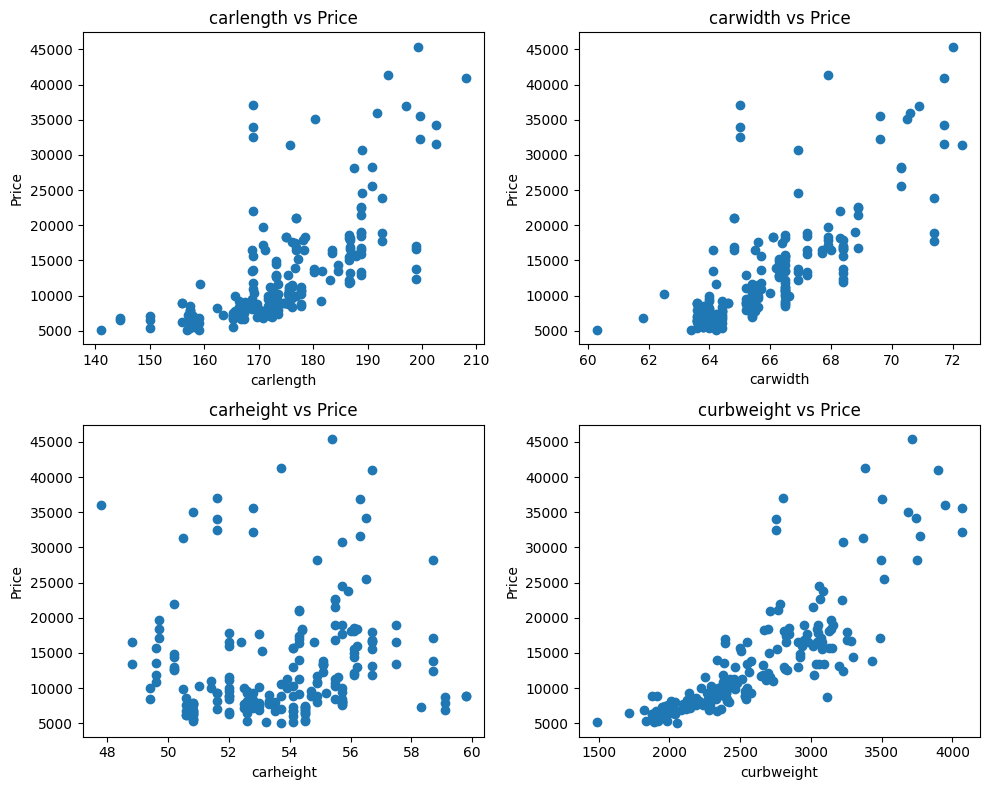

In [ ]:
#Scatter Plots of Car Features vs. Price

def scatter(x,fig):
    plt.subplot(2,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,8))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


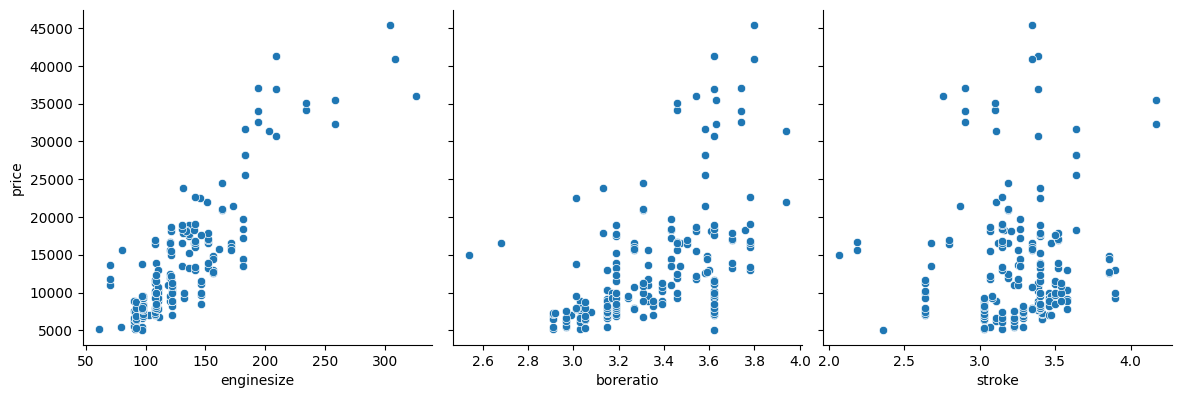

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


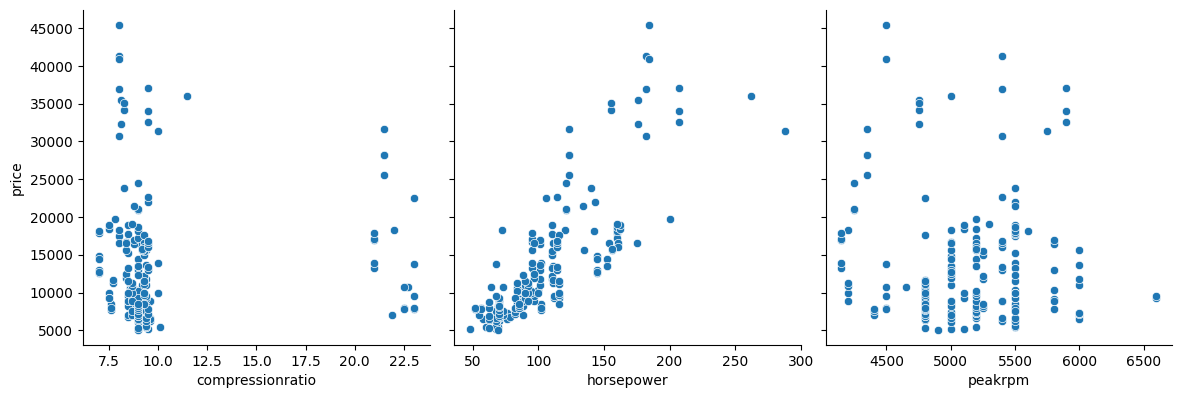

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


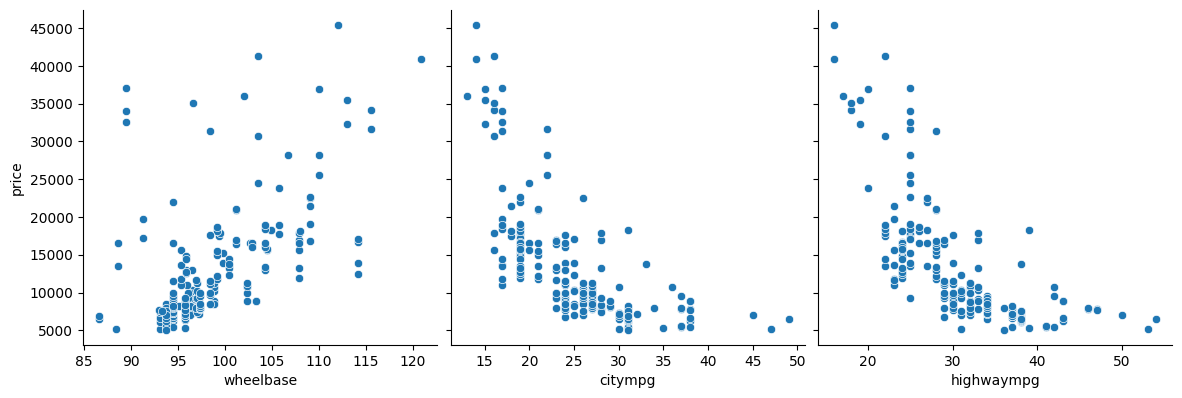

In [ ]:
#pair wise relationship vs price

def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

In [ ]:
#create a custom mapping dictionary for the cylinder column

In [ ]:
# Check first what are the values of the cylinder column

df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [ ]:
# Create custom mapping dictionary for cylindernumber column and replace number words to numeric values

def replace_values(a,b):
    df.cylindernumber.replace(a,b,inplace=True)

replace_values('four','4')
replace_values('six','6')
replace_values('five','5')
replace_values('three','3')
replace_values('twelve','12')
replace_values('two','2')
replace_values('eight','8')

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df=df.drop(["car_ID","CarName","symboling","fuelsystem","stroke","compressionratio","peakrpm"],axis=1)
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,3.47,111,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,3.47,111,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,2.68,154,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,3.19,102,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,3.78,114,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,3.78,160,19,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,3.58,134,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,3.01,106,26,27,22470.0


In [ ]:
df.drop('carheight' ,axis = 1 , inplace=True)

<Axes: >

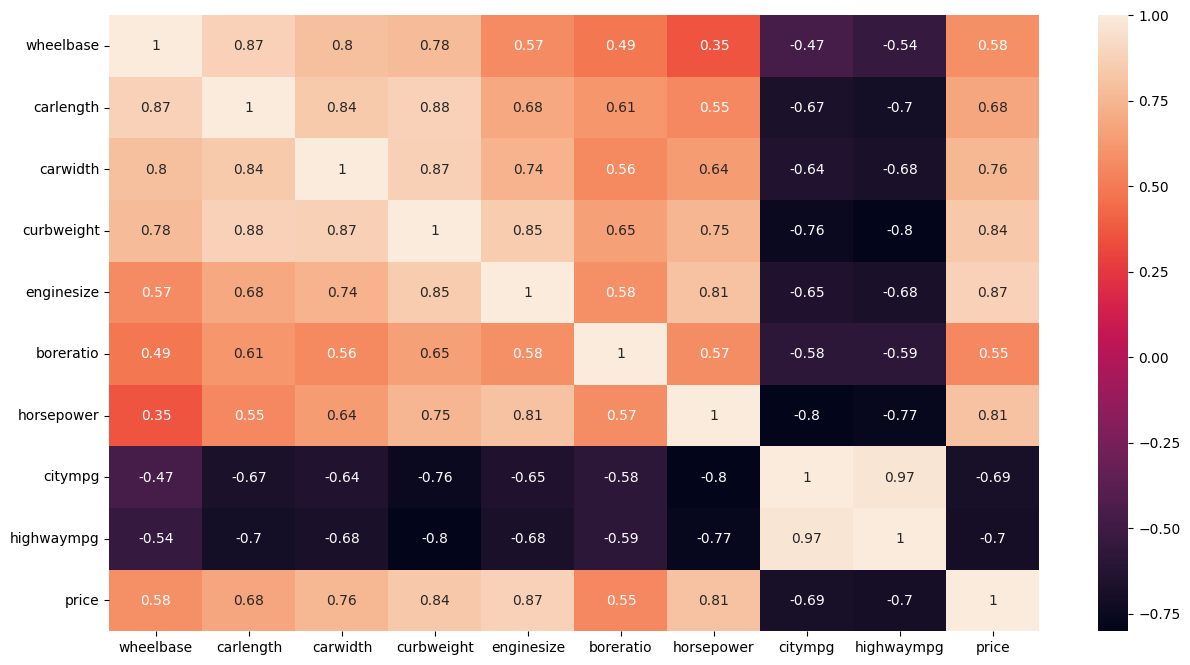

In [ ]:
# correlation of final dataFrame

plt.figure(figsize=(15,8))
numerical_variable = df.select_dtypes(exclude=['object' , 'category']).columns
sns.heatmap(df[numerical_variable].corr() , annot=True)

In [ ]:
df=pd.get_dummies(data=df,columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber"])


In [ ]:
df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_12,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,0,0,1,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,0,0,1,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,1,0,0,0,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,0,0,1,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x=df.drop(["price"],axis=1)
x

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_diesel,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_12,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,0,...,0,0,0,0,0,0,1,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,0,...,0,0,0,0,0,0,1,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,0,...,0,1,0,0,0,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,0,...,0,0,0,0,0,0,1,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,23,28,0,...,0,0,0,0,0,0,1,0,0,0
201,109.1,188.8,68.8,3049,141,3.78,160,19,25,0,...,0,0,0,0,0,0,1,0,0,0
202,109.1,188.8,68.9,3012,173,3.58,134,18,23,0,...,0,1,0,0,0,0,0,0,1,0
203,109.1,188.8,68.9,3217,145,3.01,106,26,27,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y=df["price"]
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

Model Selection and Training (Linear Regression)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
xtrain

array([[-0.70859588, -0.71090875, -0.98497154, ..., -0.23811978,
        -0.36413828, -0.15811388],
       [ 0.60652104,  0.12600239,  0.27673119, ..., -0.23811978,
        -0.36413828, -0.15811388],
       [-0.70859588, -0.31276656, -0.98497154, ..., -0.23811978,
        -0.36413828, -0.15811388],
       ...,
       [-0.70859588, -0.71090875, -0.98497154, ..., -0.23811978,
        -0.36413828, -0.15811388],
       [ 0.68975629,  0.76790511,  0.83748795, ..., -0.23811978,
         2.74620951, -0.15811388],
       [ 0.27358005,  0.85728397,  0.27673119, ..., -0.23811978,
         2.74620951, -0.15811388]])

In [ ]:
xtest

array([[ 0.78963859,  1.21479941,  0.46365011, ..., -0.23811978,
         2.74620951, -0.15811388],
       [ 0.1237566 ,  0.33726152,  0.93094742, ...,  4.19956708,
        -0.36413828, -0.15811388],
       [-0.25912554, -0.05275533, -0.33075531, ..., -0.23811978,
        -0.36413828, -0.15811388],
       ...,
       [-0.47553718, -0.06900603,  0.18327172, ..., -0.23811978,
        -0.36413828, -0.15811388],
       [-0.70859588, -1.47469173, -1.07843101, ..., -0.23811978,
        -0.36413828, -0.15811388],
       [ 0.68975629,  0.76790511,  0.83748795, ..., -0.23811978,
         2.74620951, -0.15811388]])

In [ ]:
ytrain

90      7099.0
173     8948.0
93      7349.0
5      15250.0
167     8449.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 153, dtype: float64

In [ ]:
ytest

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
95      7799.000
159     7788.000
162     9258.000
147    10198.000
182     7775.000
191    13295.000
164     8238.000
65     18280.000
175     9988.000
73     40960.000
152     6488.000
18      5151.000
82     12629.000
86      8189.000
143     9960.000
60      8495.000
101    13499.000
98      8249.000
30      6479.000
25      6692.000
16     41315.000
168     9639.000
195    13415.000
97      7999.000
194    12940.000
67     25552.000
120     6229.000
154     7898.000
202    21485.000
79      7689.000
69     28176.000
145    11259.000
55     10945.000
45      8916.500
84     14489.000
146     7463.000
66     18344.000
111    15580.000
153     6918.000
96      7499.000
38      9095.000
24      6229.000
139     7053.000
112    16900.000
29     12964.000
19      6295.000
178    16558.000
Name: price, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [ ]:
#create a dataframe that only shows the actual price and the predicted price

y_test_predicted = model.predict(xtest)

#Create a dataframe for the predicted values (y_test_predicted)
y_test_predicted_df = pd.DataFrame(pd.Series(y_test_predicted, name='Predicted Price'))
# Reset the index for y_predicted_df
y_test_predicted_df.reset_index(drop=True, inplace=True)


#Create a Dataframe for the actual target values (y_test)
y_test_df = pd.DataFrame(pd.Series(ytest, name='Actual Price'))

# Reset the index for y_test_df
y_test_df.reset_index(drop=True, inplace=True)

#Concatenate the DataFrame horizontally to create a final DataFrame
train_test_df = pd.concat([y_test_df, y_test_predicted_df], axis=1)
train_test_df.head()


,Actual Price,Predicted Price
0,30760.000,25767.878566
1,17859.167,20848.720089
2,9549.000,10584.704715
3,11850.000,11944.161726
4,28248.000,25921.654916


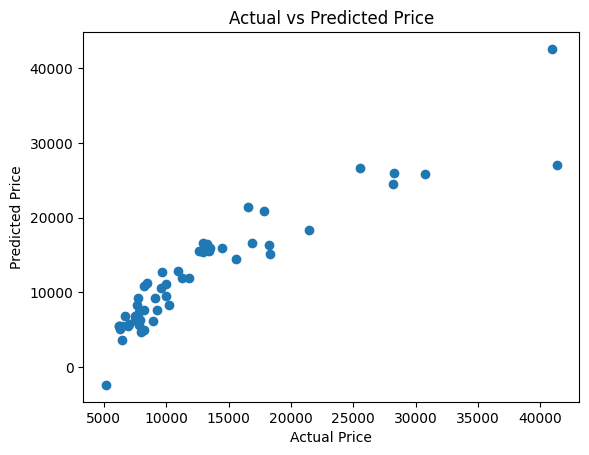

In [ ]:
#scatter plot that showing actual vs predicted

plt.scatter(ytest, y_test_predicted)
plt.title('Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
#using R2 score to check for how good the model is

from sklearn.metrics import r2_score, mean_absolute_error
r2=r2_score(ytest, y_test_predicted)
print("R2 score: ", r2)
print("R2 Score of the Actual data {}%".format(round(r2 * 100, 2)))
print("Mean Absolute Error: ", mean_absolute_error(ytest, y_test_predicted))

R2 score:  0.8559034820978064
R2 Score of the Actual data 85.59%
Mean Absolute Error:  2218.3163239512774


In [ ]:
rmse = np.sqrt(mean_squared_error(ytest, ypred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 3122.419521379503


PRICE PREDICTION FOR NEW CAR FEATURES

In [ ]:
new_car_features = [2500, 0, 2, 3, 0, 96.0, 152.0, 55.4, 2001, 120, 4, 2.46, 3.19, 9.0, 68, 300, 31, 38, 0, 0, 0, 1, 0, 0, 2,0,0,0,1,0,0,0,0,0,1,0,0,0,0]
new_car_price = model.predict([new_car_features])
print("Predicted Price:", new_car_price[0])

Predicted Price: 4053125.37402227


.

**CONCLUSION**:
the regression model developed for car price prediction exhibits strong performance on the test set, as evidenced by an impressive R2 score of 85.59%. This score signifies that the model captures a substantial portion of the variance in car prices, indicating its ability to provide reliable predictions. The Mean Absolute Error (MAE) of 2218.32 further underscores the accuracy of the model, showcasing its capability to predict car prices with a relatively small average deviation from the actual values.These results suggest that the model is well-suited for practical applications within the automotive industry.

SUBMITTED BY

> FASEELA V A

> EMAIL: fasiaslu23@gmail.com







